In [22]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset  # we are loading the dataset(a file named "student.csv') into the data frame.
df = pd.read_csv('Student.csv') # A dataframe is like a table,where rows represnt data points and columns represent atrributes of data.


# explore th Data -view the first few rows 

print(df.head()) # shows the firdt 5 rows by defaults

   Student_ID  Delta_PSD  Theta_PSD  Alpha_PSD  Beta_PSD  Gamma_PSD  \
0           1   2.314088   1.742430   0.616145  1.450662   1.216755   
1           1   2.318385   1.835014   2.309860  1.287361   0.791005   
2           1   0.642600   1.271165   1.089352  2.342411   0.667838   
3           1   1.287584   2.263698   1.637140  1.963418   1.429695   
4           1   1.243210   1.445633   0.681308  1.619296   1.821697   

   Pupil_Dilation  Blink_Rate  Fixation_Duration  Saccade_Velocity  \
0        1.494789          12                669        132.352746   
1        1.477851          19                646        153.856766   
2        1.919485          24                450        270.936784   
3        2.518240          20                771        272.983700   
4        2.363850          19                307        185.129183   

  Learning_Content_Type Difficulty_Level  Engagement_Label  
0                  Text             Easy                 0  
1                 Video       

In [23]:
#2 .get summary info about the data set
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             3000 non-null   int64  
 1   Delta_PSD              3000 non-null   float64
 2   Theta_PSD              3000 non-null   float64
 3   Alpha_PSD              3000 non-null   float64
 4   Beta_PSD               3000 non-null   float64
 5   Gamma_PSD              3000 non-null   float64
 6   Pupil_Dilation         3000 non-null   float64
 7   Blink_Rate             3000 non-null   int64  
 8   Fixation_Duration      3000 non-null   int64  
 9   Saccade_Velocity       3000 non-null   float64
 10  Learning_Content_Type  3000 non-null   object 
 11  Difficulty_Level       3000 non-null   object 
 12  Engagement_Label       3000 non-null   int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 304.8+ KB
None


In [24]:
# Describe statistical properties of the dataset (mean, std, min, max)
print(df.describe())

        Student_ID    Delta_PSD    Theta_PSD    Alpha_PSD     Beta_PSD  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean    150.500000     1.472100     1.519586     1.512937     1.488765   
std      86.616497     0.579312     0.577530     0.574197     0.583241   
min       1.000000     0.501110     0.500661     0.500403     0.500845   
25%      75.750000     0.967717     1.030661     1.016304     0.970646   
50%     150.500000     1.469271     1.530436     1.521254     1.491592   
75%     225.250000     1.959954     2.026343     2.012065     1.985428   
max     300.000000     2.499895     2.499924     2.499533     2.499097   

         Gamma_PSD  Pupil_Dilation   Blink_Rate  Fixation_Duration  \
count  3000.000000     3000.000000  3000.000000        3000.000000   
mean      1.491715        2.002529    19.485333         497.171667   
std       0.581156        0.577870     5.761208         173.530600   
min       0.500130        1.000118    10.000000      

In [25]:
#Identify Missing Values
# Check for missing values in the dataset
print(df.isnull().sum())

Student_ID               0
Delta_PSD                0
Theta_PSD                0
Alpha_PSD                0
Beta_PSD                 0
Gamma_PSD                0
Pupil_Dilation           0
Blink_Rate               0
Fixation_Duration        0
Saccade_Velocity         0
Learning_Content_Type    0
Difficulty_Level         0
Engagement_Label         0
dtype: int64


In [28]:
# 5. Handle Missing Values
# Decide how to handle missing values
# Fill missing values in numerical columns with the mean

numerical_columns = df.select_dtypes(include=[np.number]).columns # select coumn with numerical data types
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean()) # replace NaN with the mean od the coumn

#confirm of they were filled
print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values after filling:
Student_ID               0
Delta_PSD                0
Theta_PSD                0
Alpha_PSD                0
Beta_PSD                 0
Gamma_PSD                0
Pupil_Dilation           0
Blink_Rate               0
Fixation_Duration        0
Saccade_Velocity         0
Learning_Content_Type    0
Difficulty_Level         0
Engagement_Label         0
dtype: int64


In [30]:
## Fill missing values in categorical columns with the mode
categorical_columns = df.select_dtypes(include=[object]).columns # select coumn with object(text) data types
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0]) # replcae nan with the most frequent value (mode)
print("\nMissing values in categorical columns after filling:")
print(df[categorical_columns].isnull().sum())


Missing values in categorical columns after filling:
Learning_Content_Type    0
Difficulty_Level         0
dtype: int64


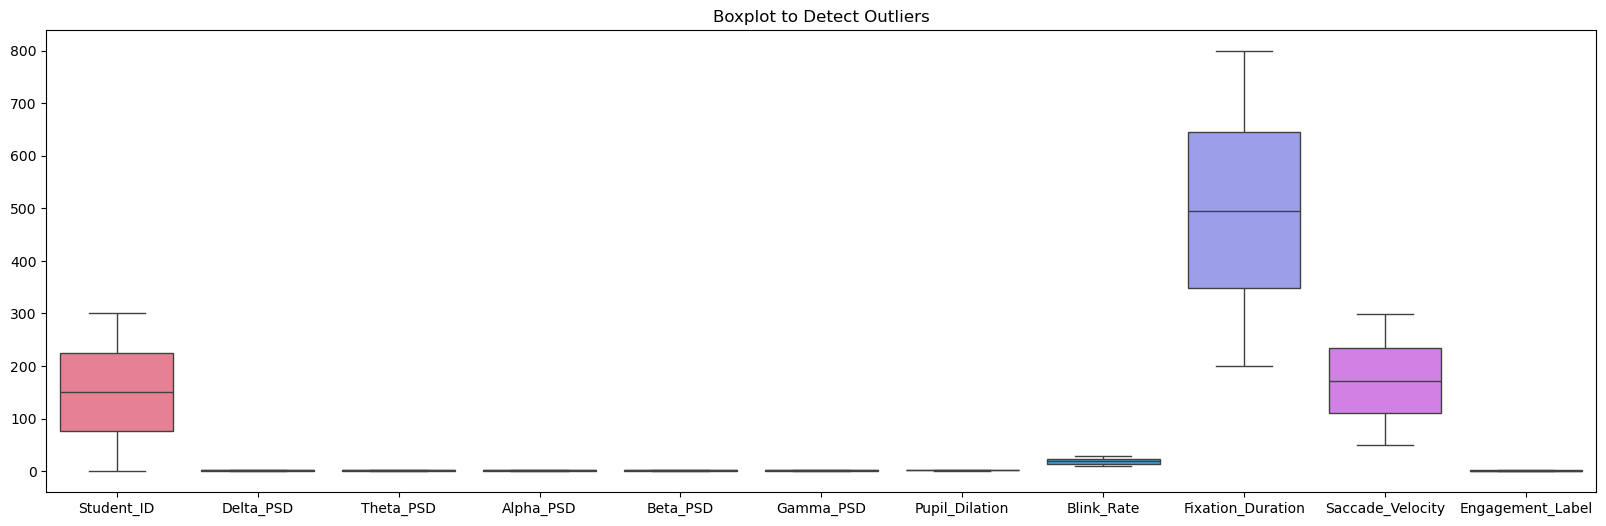

In [40]:
# 6. Detect Outliers
# Use boxplot to detect outliers for all numerical columns
plt.figure(figsize=(20,6)) # sets the figure size of a plot
sns.boxplot(data=df[numerical_columns]) # create a boxplot for the numerical columns
plt.title("Boxplot to Detect Outliers") # adds  a title to the plot
plt.show() # display the boxplot 

In [33]:
# Alternatively, you can use IQR to detect outliers in a specific numerical column:
for column in numerical_columns:
    Q1 = df[column].quantile(0.25) # first quartile (25th percentile)
    Q3 = df[column].quantile(0.75) # third quartile (75th percentile)
    IQR = Q3 - Q1 # interquarile range
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)] #filyer rows where data is outside the IQR bounds
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in Student_ID:
Empty DataFrame
Columns: [Student_ID, Delta_PSD, Theta_PSD, Alpha_PSD, Beta_PSD, Gamma_PSD, Pupil_Dilation, Blink_Rate, Fixation_Duration, Saccade_Velocity, Learning_Content_Type, Difficulty_Level, Engagement_Label]
Index: []
Outliers in Delta_PSD:
Empty DataFrame
Columns: [Student_ID, Delta_PSD, Theta_PSD, Alpha_PSD, Beta_PSD, Gamma_PSD, Pupil_Dilation, Blink_Rate, Fixation_Duration, Saccade_Velocity, Learning_Content_Type, Difficulty_Level, Engagement_Label]
Index: []
Outliers in Theta_PSD:
Empty DataFrame
Columns: [Student_ID, Delta_PSD, Theta_PSD, Alpha_PSD, Beta_PSD, Gamma_PSD, Pupil_Dilation, Blink_Rate, Fixation_Duration, Saccade_Velocity, Learning_Content_Type, Difficulty_Level, Engagement_Label]
Index: []
Outliers in Alpha_PSD:
Empty DataFrame
Columns: [Student_ID, Delta_PSD, Theta_PSD, Alpha_PSD, Beta_PSD, Gamma_PSD, Pupil_Dilation, Blink_Rate, Fixation_Duration, Saccade_Velocity, Learning_Content_Type, Difficulty_Level, Engagement_Label]
Index: []
Out

In [46]:
# Remove duplicate rows
print("\nDuplicate rows in the dataset:")
print(df.duplicated().sum()) # # duplicated() checks for duplicate rows, sum() counts the number of duplicates

df.drop_duplicates(inplace=True) #  drop_duplicates() removes duplicate rows, inplace=True modifies the DataFrame directly


Duplicate rows in the dataset:
0


In [50]:
 8. #Standardize Data Formats
# Convert all values in categorical columns (text data) to lowercase to ensure uniformity
for column in categorical_columns:
    df[column] = df[column].str.lower()  # str.lower() converts text to lowercase

In [51]:
 9. #Sampling Data
# Take a random sample of the cleaned data (e.g., 100 rows)
sampled_df = df.sample(n=100, random_state=42)

In [52]:
# 10. Save the Cleaned Data
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_Student.csv', index=False)
print("\nThe cleaned data has been saved to 'cleaned_Student.csv'")


The cleaned data has been saved to 'cleaned_Student.csv'
